In [12]:
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt
import random

In [13]:
# 1. Carregar o CSV
caminho = "Relacao_Atendimentos.csv"
df = pd.read_csv(caminho)

# 2. Padronizar nomes das colunas (caso haja espaços)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [14]:
# Extrai os nomes únicos dos profissionais
nomes_reais = df['profissional'].unique()

# Cria uma lista de nomes fictícios no mesmo tamanho
# nomes_ficticios = [
#     'Dra. Ana Souza', 'Dr. João Lima', 'Dra. Carla Mendes', 'Dr. Rafael Rocha',
#     'Dra. Beatriz Martins', 'Dr. Lucas Carvalho', 'Dr. Fernando Torres',
#     'Dra. Juliana Prado', 'Dr. Henrique Silva', 'Dra. Mariana Duarte',
#     "Dra. Edu brito", 'Dra. elza wata', 'Dra Regina',
#     'Dra Jaque', 'Dra Fabricio', 'Dra Walter', 'Dra Akira',
#     'Dra Pupu', 'Dra Mau', 'Dra Karise', 'Dra lhama', 'Dra elza',
#     'Dra ohta','Dra jeje', 'Dra jo', 'Dra prepre', 'Dra soso', 'Dra mimica', 'Dra baby',
#     'Dra teresinha', 'Dra mimico'
# ]

# Lista de nomes e sobrenomes genéricos
nomes = ['Ana', 'João', 'Carla', 'Rafael', 'Beatriz', 'Lucas', 'Fernando', 'Juliana', 'Henrique', 'Mariana', 'Paula', 'Eduardo', 'Camila', 'André', 'Sofia']
sobrenomes = ['Silva', 'Souza', 'Lima', 'Carvalho', 'Mendes', 'Martins', 'Rocha', 'Torres', 'Prado', 'Duarte', 'Ferreira', 'Oliveira', 'Cunha', 'Castro', 'Teixeira']


# # Garante que o número de nomes fictícios seja suficiente
# assert len(nomes_ficticios) >= len(nomes_reais), "Adicione mais nomes fictícios"

# Gera nomes fictícios únicos o suficiente
nomes_ficticios = set()
while len(nomes_ficticios) < len(nomes_reais):
    nome = f"Dr(a). {random.choice(nomes)} {random.choice(sobrenomes)}"
    nomes_ficticios.add(nome)

# Cria o dicionário de mapeamento
mapa_nomes = dict(zip(nomes_reais, nomes_ficticios))

# Aplica a substituição
df['profissional'] = df['profissional'].map(mapa_nomes)


In [15]:
print(df['profissional'].unique()[:10])  # mostra os primeiros 10 nomes fictícios


['Dr(a). Ana Ferreira' 'Dr(a). Rafael Ferreira' 'Dr(a). Fernando Carvalho'
 'Dr(a). Sofia Castro' 'Dr(a). Juliana Lima' 'Dr(a). Henrique Castro'
 'Dr(a). Juliana Castro' 'Dr(a). Camila Teixeira' 'Dr(a). André Teixeira'
 'Dr(a). Sofia Oliveira']


/tmp/ipykernel_53269/3170219382.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_horario['profissional'] = filtro_horario['profissional'].fillna('').str.strip()


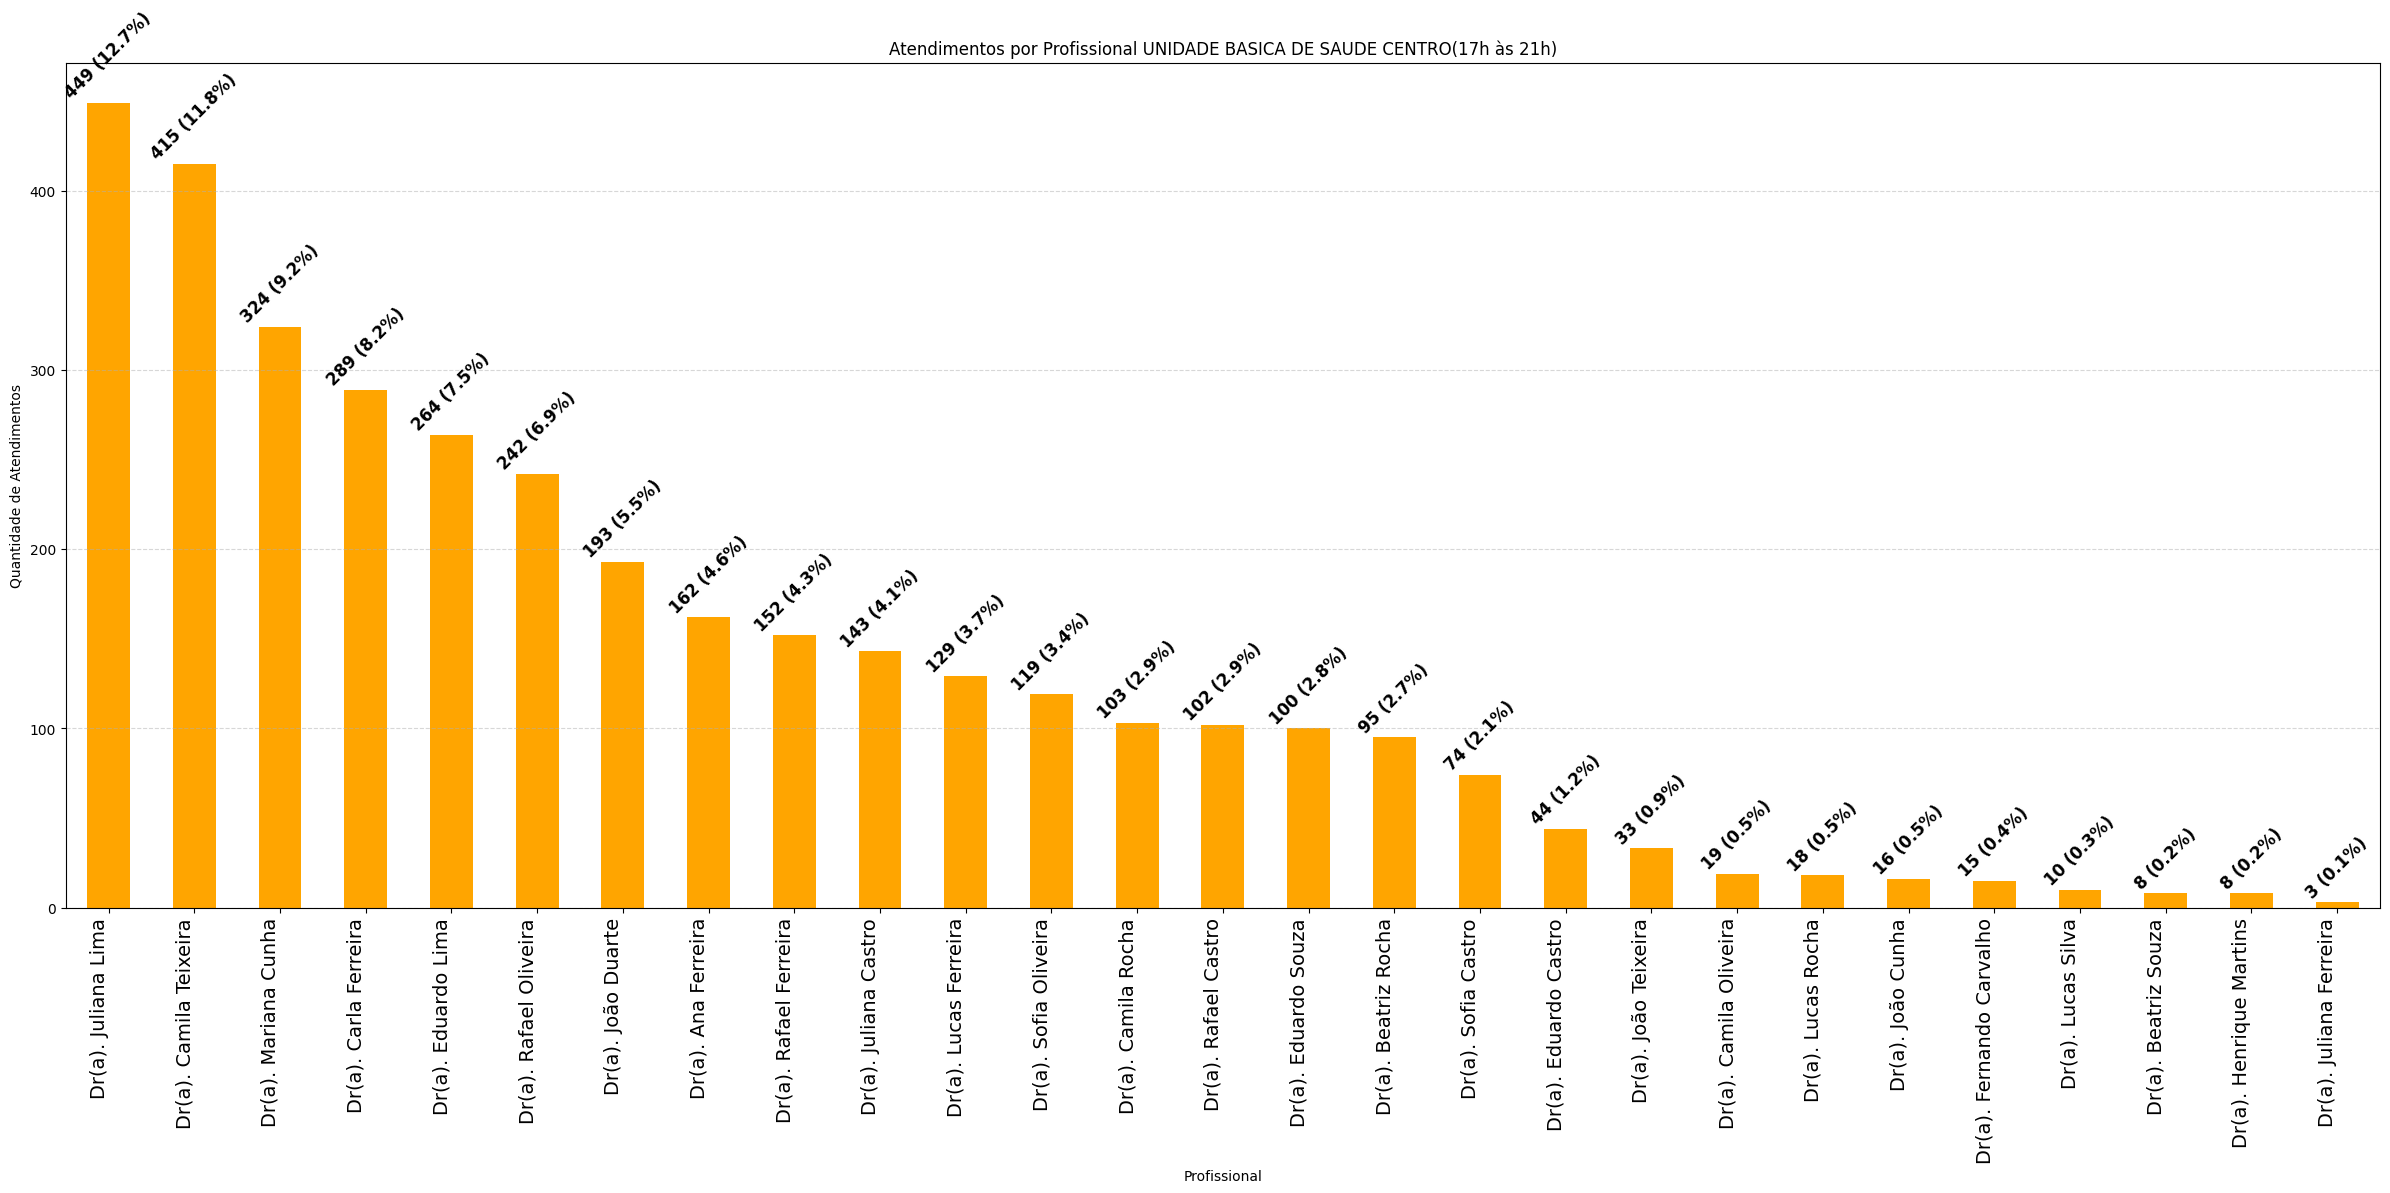

In [17]:
#  Manter somente as colunas até 'bairro'
colunas_ate_bairro = df.columns[:df.columns.get_loc('bairro') + 1]
df = df[colunas_ate_bairro]

# 3. === AJUSTAR COLUNA DE DATA E HORA ===

# Converter para datetime
df['data_atendimento'] = pd.to_datetime(df['data_atendimento'], errors='coerce')

# Extrair hora do atendimento
df['hora_atendimento'] = df['data_atendimento'].dt.hour

# 4. === FILTRAR ATENDIMENTOS ENTRE 17h E 21h ===

filtro_horario = df[(df['hora_atendimento'] >= 17) & (df['hora_atendimento'] <= 21)]

# 5. === CONTAR ATENDIMENTOS POR PROFISSIONAL ===

# Limpar e contar
filtro_horario['profissional'] = filtro_horario['profissional'].fillna('').str.strip()
atendimentos_por_profissional = filtro_horario['profissional'].value_counts()
total = atendimentos_por_profissional.sum()

# 6. === GERAR O GRÁFICO ===

plt.figure(figsize=(24, 12))
ax = atendimentos_por_profissional.plot(kind='bar', color='orange')

plt.title('Atendimentos por Profissional UNIDADE BASICA DE SAUDE CENTRO(17h às 21h)')
plt.xlabel('Profissional')
plt.ylabel('Quantidade de Atendimentos')
plt.xticks(rotation=90, ha='right',fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)


# Adicionar rótulos de valor + porcentagem
for i, valor in enumerate(atendimentos_por_profissional):
    percentual = (valor / total) * 100
    ax.text(i, valor + 0.5, f'{valor} ({percentual:.1f}%)',
            ha='center', va='bottom', fontsize=12,fontweight='bold', rotation=45)

plt.tight_layout()
plt.show()
